In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url= "http://bit.ly/w-data"
data=pd.read_csv(url)

In [3]:
print (data.shape)

(25, 2)


In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [9]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#Outlier removal

In [10]:
def null_detection(data):
    num_cols=[]
    c=0
    t=[]
    for i in num_cols:
        z=np.abs(stats.zscore(data[i]))
        for j in range (len(z)):
            if z[j]>3 or z[j]<-3:
                t.append[j]
                c+=1
    data=data.drop(list(set(t)))
    data=data.reset_index()
    data=data.drop('index', axis=1)
    print(c)
    return data

In [11]:
data=null_detection(data)

0


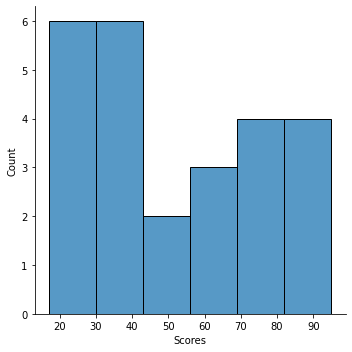

In [12]:
sns.displot(data['Scores'])
plt.show()

In [13]:

#mean_x=np.mean(data['Hours'])
#mean_y=np.mean(data['Scores'])
#num=0
#d=0
#x=list(data['Hours'])
#y=list(data['Scores'])
#for i in range(len(data)):
#    num+= (x[i].mean_x)*(y[i].mean_y)
#    d+= (x[i].mean_x)**2
#b1=num/d



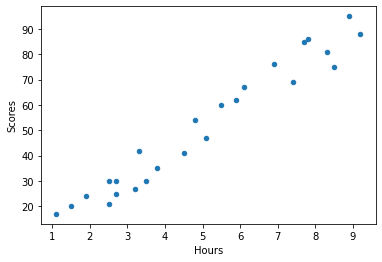

In [14]:
data.plot(kind='scatter',x='Hours',y='Scores')
plt.show()

In [15]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

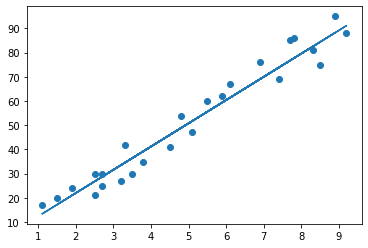

In [17]:
m=reg.coef_
c=reg.intercept_
line=m*x +c
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [18]:
y_pred=reg.predict(x_test)

# Comparing between targeted and Predicted

In [19]:
act_pred=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
act_pred


,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


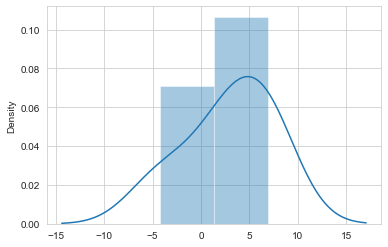

In [20]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

# Predicting the score of a student who studies 9.25 hours


In [21]:
h=9.25
s=reg.predict([[h]])
s

array([91.56986604])